# An example demonstrating the use of Hydro Code (Generalized Example)

**Importing the modules**

In [1]:
from hydrogenerate import calculate_potential,get_energy
from hydrogenerate_plot import get_plot

# Creating a general Flow vs Efficiency curve to calculate potential Hydropower

**calculate\_potential(flow\_info, rated\_flow=None, rated\_power=None, turb= None, head\_input=40, op='Timeseries', sys\_effi=None, system='pipe', flow\_column=None)**


**Input:**

**flow\_info:** Dataframe consisting of flow information.

**rated\_flow:** Design flow of the plant or channel in cubic feet/sec (cfs). If **None** or not provided, the maximum flow from the available data is considered as design flow. For _**op:** Generalized_, user must provide **rated\_flow**. **Type: Float**

**rated\_power:** Rated or maximum capacity of turbine installed in MegaWatts (MW). If **None** or not provided, 75<sup>th</sup> percentile of computed power is considered as rated power, **Type: Float**.

**turb**: Provide a choice for turbine selection. If **None** or not provided an appropriate turbine selection is made based on provided head.  **Type: String**

_Options_: 
           
- **Kaplan Turbine**;

- **Francis Turbine**;

- **Pelton Turbine**;

- **Turgo Turbine**;

- **Crossflow Turbine**;



Default turbine selection based on **head\_input:**

|Head Category|Start (m)|End (m)|Suitable Turbine|k<sub>2</sub>|
|--------------|-------|-------|-------|-------|
|Very low head|0.5|10|Kaplan turbine|800|
|Low head|10|60|Kaplan turbine|800|
|Medium head|60|150|Francis turbine|600|
|High head|150|350|Francis turbine|600|
|Very high head|350|700|Pelton turbine|0|


**head\_input:** Head information provided by the user in feet (ft.).  **Type: Float**

**op:** Options: {_'Generalized'_ and _'Timeseries'_}; **Default: 'Timeseries'**. **Type: String**

- **'Generalized'** provides power in MW as a percentage of streamflow, 

- **'Timeseries'** calculates power in MW from timeseries streamflow values,

**sys\_effi:** Water to wire efficiency, If **None** or not provided **Default: 0.98 (98%)**, **Type: Float**

**system:** Options:{_'pipe'_, _'canal'_ and _'reservoir'_}, **Default: 'pipe'**, **Type: String**

System determines the percentage loss or head loss;

For _'pipe': 5\%_; _'canal': 20\%_ and _'reservoir': 0.1\%_

**flow\_column:** Name of the column containing flow information; If **None** or not provided **Default: 'Flow (cfs)'**, **Type: String**

**Returns:** 

Dictionary; **{'power', 'efficiency', 'flow', 'turb\_cap'}**

**power:** Numpy array of estimated power in MW

**efficiency:** Numpy arrary of estimated turbine efficiency in percentage

**flow:** Numpy array of water flow rate in cfs

**turb\_cap:** Float value of estimated turbine capacity in MW

In [2]:
x= calculate_potential(rated_flow=850,head_input=20,op='Generalized',system='pipe')

Assigning Variable Names to the elements in the dictionary

In [3]:
power = x["power"]

efficiency = x["efficiency"]

flow_range = x["flow"]

turb_cap = x["turbine_capacity"]

# Calculate Energy Potential and Estimated Costs

**get\_energy(power, turb\_cap, flow\_info, time\_step= None, op, energy\_cost= None, const\_cost= None)**

**Input:**

**power:** Numpy array containing calculated power.

**flow\_info:** DataFrame consisting of flow information.

**turb\_cap:** Turbine capacity obtained from the previous function.

**op:** Same as previous function.

**time\_step:** Essential for computing total energy in MWh; If None or not provided takes the _'Date/Time'_ column from **flow\_info**. If provided by user input needs to be in hrs. **Type: Float**

**energy\_cost:** Sale price of energy generated in \$. If None or not provided defaults to **4 cents/kWh**.

**const\_cost:** Estimated cost of construction of the plant. If None or not provided defaults to **4.1 million \$/MW**.

**Returns:**

_Total Estimated Energy in MWh_

_Expected Annual Revenue in \$_

_Expected Construction Cost in \$_

In [4]:
tot_mwh,revenue,const_cost = get_energy(power,turb_cap,op='Generalized')

In [5]:
print('Total Energy: {} MWh'.format(tot_mwh))
print('Total Expected Revenue: $ {}'.format(revenue))
print('Total Cost of Construction: {} Million $'.format(const_cost))

Total Energy: 3345.1675650912157 MWh
Total Expected Revenue: $ 1338.0670260364864
Total Cost of Construction: 3.2711868784658478 Million $


# Plotting the results

**get\_plot(power, efficiency, flow\_range, op, flow\_info= None, rated\_flow= None, font= None, fontsize= None)**
             
**Input:**

**font:** Determines the type of font, Default: _'Times New Roman'_.

**fontsize:** Determines the type of fontsize, Default: 15.

**Returns:**

Plot

Provide a title for the figure: Generalized Hydropower Generation


C:\Users\mitr284\OneDrive - PNNL\Documents\GitHub\My_Code\My_HAT\hydrogenerate_plot.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
C:\Users\mitr284\OneDrive - PNNL\Documents\GitHub\My_Code\My_HAT\hydrogenerate_plot.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
findfont: Font family ['Time New Roman'] not found. Falling back to DejaVu Sans.


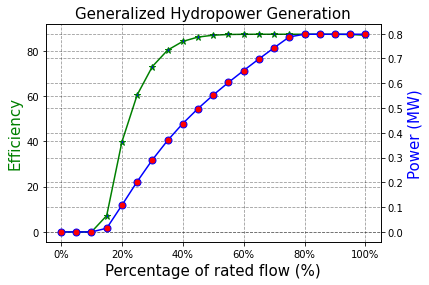

In [6]:
get_plot(power,efficiency,flow_range,rated_flow=850,op='Generalized')